# Evaluate effects of ribosome and tRNA variation

In [1]:
import cPickle as pkl
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import pandas as pd

In [2]:
orf_genomic_dict = pkl.load(open("../parameters/orf_coding.p"))

## 1. Ribosome capacity utilization

In [1]:
runs = [
r"/home/martin/git/TRSL/results/100000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160425_1059_1200s.p",
r"/home/martin/git/TRSL/results/100000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_1717_1200s.p",
r"/home/martin/git/TRSL/results/200000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_1812_1200s.p",
r"/home/martin/git/TRSL/results/200000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_1955_1200s.p",
r"/home/martin/git/TRSL/results/300000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_2115_1200s.p",
r"/home/martin/git/TRSL/results/300000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_2349_1200s.p"]

Function to replace `_numpypy.multiarray` by `numpy.core.multiarray`. Source: http://stackoverflow.com/questions/39086/search-and-replace-a-line-in-a-file-in-python

In [3]:
from tempfile import mkstemp
from shutil import move
from os import remove, close

def replace(file_path, pattern, subst):
    # Create temp file
    fh, abs_path = mkstemp()
    with open(abs_path, 'w') as new_file:
        with open(file_path) as old_file:
            for line in old_file:
                new_file.write(line.replace(pattern, subst))
    close(fh)
    # Remove original file
    remove(file_path)
    # Move new file
    move(abs_path, file_path)

In [19]:
for run in runs:
    print run
    #replace(run, "_numpypy.multiarray", "numpy.core.multiarray") # takes long time

/home/martin/git/TRSL/results/100000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160425_1059_1200s.p
/home/martin/git/TRSL/results/100000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_1717_1200s.p
/home/martin/git/TRSL/results/200000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_1812_1200s.p
/home/martin/git/TRSL/results/200000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_1955_1200s.p
/home/martin/git/TRSL/results/300000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_2115_1200s.p
/home/martin/git/TRSL/results/300000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160

Absolute bound ribosomes:

100000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
100000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
200000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
200000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
300000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
300000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah


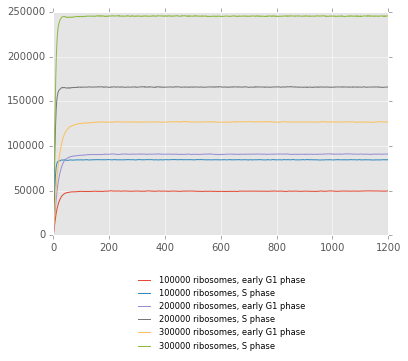

In [20]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
    
plt.rcParams['legend.loc'] = 'lower center'

for run in runs:
    results = pkl.load(open(run))
    print results['description']
    plt.plot(results["timerange"], results["timecourses"]["ribos._bound"], 
             label=results['description'].split('transcriptome')[0].strip())

legend = plt.legend(prop = fontP, bbox_to_anchor=(0.5, -0.55)).get_frame()
legend.set_facecolor('white')

Bound ribosomes per total ribosomes:

transcriptome length: 15126
100000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 72542
100000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 15126
200000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 72542
200000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 15126
300000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 72542
300000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah


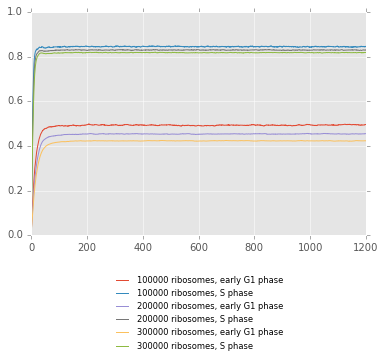

In [21]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
    
plt.rcParams['legend.loc'] = 'lower center'

for run in runs:
    results = pkl.load(open(run))
    print "transcriptome length: {}".format(len(results['transcriptome']))
    print results['description']
    plt.plot(results["timerange"], np.array(results["timecourses"]["ribos._bound"]) * 1.0 /
             (np.array(results["timecourses"]["ribos._bound"])+np.array(results["timecourses"]["ribos._free"])), 
             label=results['description'].split('transcriptome')[0].strip())
    plt.ylim([0.0, 1.0])

legend = plt.legend(prop = fontP, bbox_to_anchor=(0.5, -0.55)).get_frame()
legend.set_facecolor('white')

Limited but still visible impact of the ribosome count. If fewer ribosomes are in the system, relatively more are bound.

The effect is stronger in early G1 phase when there are fewer mRNAs, so that a ribosome will find more often an initiation site occupied by another ribosome.

Is the reduction proportional to the reduction in the transcriptome?

In [22]:
transcriptome_length = {'S': 72542, 'early G1': 15126}

In [23]:
transcriptome_length['S'] * 1.0 / transcriptome_length['early G1']

4.795848208382917

No, the ratios of bound ribosomes in S and early G1 phases are more like 1.6:1 or 2:1.

## 2. Dependency of translation efficiency on mRNA abundance

Measure genome level protein synthesis rates:

In [25]:
timecourses = {}

for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    timecourses[ribos] = {}
    
for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    phase = labellist[1].split("phase")[0].strip()
    results = pkl.load(open(run))
    timecourses[ribos][phase] = results['timecourses'] # we can now address as timecourses[100000]['S'] etc.
    
    # some genes have 5999, some 6000 timepoints, we have to fix that
    print "fixing uneven time series lengths..."
    num_timepoints = min([len(timecourses[ribos][phase][gene]) for gene in timecourses[ribos][phase]])

    print "creating timecourses..."
    timecourses[ribos][phase] = {key: timecourses[ribos][phase][key][:num_timepoints] 
                                 for key in timecourses[ribos][phase]
                                 if key in orf_genomic_dict}

fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...


In [26]:
phases = transcriptome_length.keys()
ribo_numbers = timecourses.keys()

Genome-level transcriptional efficiency:

First we calculate the sum of proteins per phase per ribosome count per simulation time.

In [27]:
data = pd.Panel4D(timecourses)
data

<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 3 (labels) x 2 (items) x 5999 (major_axis) x 5016 (minor_axis)
Labels axis: 100000 to 300000
Items axis: S to early G1
Major_axis axis: 0 to 5998
Minor_axis axis: YAL001C to YPR199C

Convert from count to real simulation time:

In [28]:
data.rename_axis(mapper=lambda x: 0.2*x, axis=2, inplace=True)

In [29]:
data

<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 3 (labels) x 2 (items) x 5999 (major_axis) x 5016 (minor_axis)
Labels axis: 100000 to 300000
Items axis: S to early G1
Major_axis axis: 0.0 to 1199.6
Minor_axis axis: YAL001C to YPR199C

In [30]:
data[100000]

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 5999 (major_axis) x 5016 (minor_axis)
Items axis: S to early G1
Major_axis axis: 0.0 to 1199.6
Minor_axis axis: YAL001C to YPR199C

In [31]:
data[100000]['S'].tail()

,YAL001C,YAL002W,YAL003W,YAL005C,YAL007C,YAL008W,YAL009W,YAL011W,YAL012W,YAL013W,...,YPR186C,YPR187W,YPR188C,YPR189W,YPR190C,YPR191W,YPR192W,YPR196W,YPR198W,YPR199C
1198.8,25,15,10138,1882,281,199,87,12,6181,155,...,66,890,127,80,58,126,30,24,37,8
1199.0,25,15,10138,1882,281,199,87,12,6182,155,...,66,890,127,80,58,126,30,24,37,8
1199.2,25,15,10140,1883,281,199,87,12,6183,155,...,66,890,127,80,58,126,30,24,37,8
1199.4,25,15,10140,1884,281,199,87,12,6184,155,...,66,890,127,80,58,126,30,24,37,8
1199.6,25,15,10140,1885,281,199,87,12,6185,155,...,66,891,127,80,58,126,30,24,37,8


In [32]:
total_protein = data.sum(axis=3)
total_protein

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 2 (major_axis) x 5999 (minor_axis)
Items axis: 100000 to 300000
Major_axis axis: S to early G1
Minor_axis axis: 0.0 to 1199.6

In [33]:
total_protein[200000]

,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,...,1197.8,1198.0,1198.2,1198.4,1198.6,1198.8,1199.0,1199.2,1199.4,1199.6
S,0,0,0,0,0,0,0,0,0,0,...,6767079,6768251,6769363,6770428,6771578,6772789,6773925,6775050,6776200,6777384
early G1,0,0,0,0,0,0,0,0,1,1,...,3725252,3725881,3726492,3727130,3727759,3728390,3729001,3729683,3730306,3730939


Define translational efficiency by calculating the difference quotient between $t=1200$ s and $t=900$ s. The first 900 seconds are the burn-in time.

For completely unclear reasons 1199.6 does not work in the following:

In [34]:
(total_protein.minor_xs(1199.4) - total_protein.minor_xs(899.2))/(1199.4 - 899.2)/ribo_numbers

,100000,200000,300000
S,0.027502,0.028448,0.028653
early G1,0.017063,0.015797,0.014508


One might hypothesize that an optimum number of ribos exists...

Total protein after 1200 s:

In [40]:
total_protein.minor_xs(1199.4)

,100000,200000,300000
S,3275423,6776200,10223523
early G1,2014975,3730306,5129773


## 3. Systematic tuning of ribosome numbers

In [41]:
runs = [
"/home/martin/git/TRSL/results/50000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_0823_1200s.p",
"/home/martin/git/TRSL/results/50000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_0845_1200s.p",
r"/home/martin/git/TRSL/results/100000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160427_1723_1200s.p",
r"/home/martin/git/TRSL/results/100000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160427_1807_1200s.p",
r"/home/martin/git/TRSL/results/150000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160427_1926_1200s.p",
r"/home/martin/git/TRSL/results/150000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160427_2031_1200s.p",
r"/home/martin/git/TRSL/results/200000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160427_2219_1200s.p",
r"/home/martin/git/TRSL/results/200000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160427_2346_1200s.p",
r"/home/martin/git/TRSL/results/250000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160428_0158_1200s.p",
r"/home/martin/git/TRSL/results/250000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160428_0350_1200s.p",
r"/home/martin/git/TRSL/results/300000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160428_0632_1200s.p",
r"/home/martin/git/TRSL/results/300000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160428_0844_1200s.p",
r"/home/martin/git/TRSL/results/350000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160428_1203_1200s.p",
r"/home/martin/git/TRSL/results/350000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160428_1441_1200s.p",
r"/home/martin/git/TRSL/results/400000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160428_1824_1200s.p",
r"/home/martin/git/TRSL/results/400000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160428_2124_1200s.p",
r"/home/martin/git/TRSL/results/450000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_0143_1200s.p",
r"/home/martin/git/TRSL/results/450000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_0511_1200s.p"
]

In [42]:
for run in runs:
    print run
    #replace(run, "_numpypy.multiarray", "numpy.core.multiarray") # takes long time

/home/martin/git/TRSL/results/50000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_0823_1200s.p
/home/martin/git/TRSL/results/50000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_0845_1200s.p
/home/martin/git/TRSL/results/100000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160427_1723_1200s.p
/home/martin/git/TRSL/results/100000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160427_1807_1200s.p
/home/martin/git/TRSL/results/150000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160427_1926_1200s.p
/home/martin/git/TRSL/results/150000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_2016042

50000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
50000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
100000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
100000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
150000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
150000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
200000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
200000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
250000 ribosomes, S phase transcriptome, full exome, no decay,

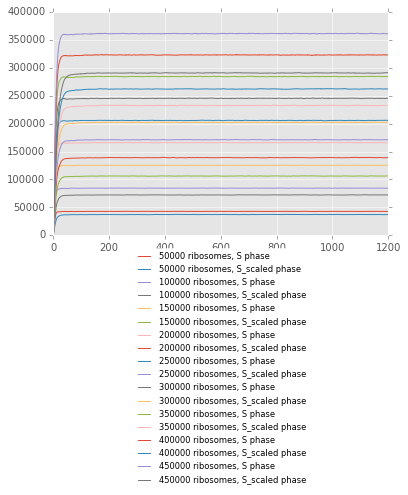

In [23]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
    
plt.rcParams['legend.loc'] = 'right'

for run in runs:
    results = pkl.load(open(run))
    print results['description']
    plt.plot(results["timerange"], results["timecourses"]["ribos._bound"], 
             label=results['description'].split('transcriptome')[0].strip())

legend = plt.legend(prop = fontP, bbox_to_anchor=(0.5, -1.25)).get_frame()
legend.set_facecolor('white')

transcriptome length: 72542
50000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 37572
50000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 72542
100000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 37572
100000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 72542
150000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 37572
150000 ribosomes, S_scaled phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 72542
200000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates accor

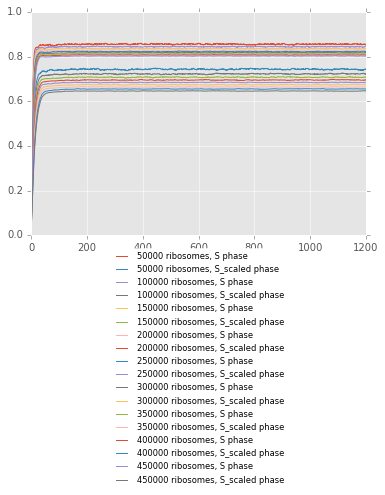

In [24]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
    
plt.rcParams['legend.loc'] = 'right'

for run in runs:
    results = pkl.load(open(run))
    print "transcriptome length: {}".format(len(results['transcriptome']))
    print results['description']
    plt.plot(results["timerange"], np.array(results["timecourses"]["ribos._bound"]) * 1.0 /
             (np.array(results["timecourses"]["ribos._bound"])+np.array(results["timecourses"]["ribos._free"])), 
             label=results['description'].split('transcriptome')[0].strip())
    plt.ylim([0.0, 1.0])

legend = plt.legend(prop = fontP, bbox_to_anchor=(0.5, -1.25)).get_frame()
legend.set_facecolor('white')

In [43]:
timecourses = {}

for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    timecourses[ribos] = {}
    
for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    phase = labellist[1].split("phase")[0].strip()
    results = pkl.load(open(run))
    timecourses[ribos][phase] = results['timecourses'] # we can now address as timecourses[100000]['S'] etc.
    
    # some genes have 5999, some 6000 timepoints, we have to fix that
    print "fixing uneven time series lengths..."
    num_timepoints = min([len(timecourses[ribos][phase][gene]) for gene in timecourses[ribos][phase]])

    print "creating timecourses..."
    timecourses[ribos][phase] = {key: timecourses[ribos][phase][key][:num_timepoints] 
                                 for key in timecourses[ribos][phase]
                                 if key in orf_genomic_dict}

fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time serie

In [44]:
ribo_numbers = sorted(timecourses.keys())
print ribo_numbers

[50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000]


In [45]:
data = pd.Panel4D(timecourses)
data

<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 9 (labels) x 2 (items) x 5999 (major_axis) x 4983 (minor_axis)
Labels axis: 50000 to 450000
Items axis: S to S_scaled
Major_axis axis: 0 to 5998
Minor_axis axis: YAL001C to YPR199C

In [46]:
data.rename_axis(mapper=lambda x: 0.2*x, axis=2, inplace=True)

In [47]:
total_protein = data.sum(axis=3)
total_protein

<class 'pandas.core.panel.Panel'>
Dimensions: 9 (items) x 2 (major_axis) x 5999 (minor_axis)
Items axis: 50000 to 450000
Major_axis axis: S to S_scaled
Minor_axis axis: 0.0 to 1199.6

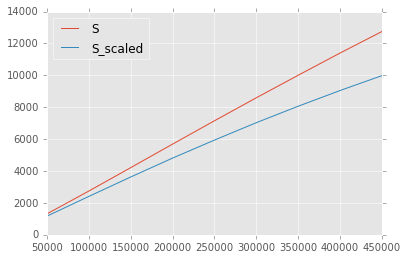

In [48]:
trans_eff_cell = (total_protein.minor_xs(1199.4) - total_protein.minor_xs(899.2))/(1199.4 - 899.2)
trans_eff_cell.T.plot()

In [49]:
trans_eff_cell

,50000,100000,150000,200000,250000,300000,350000,400000,450000
S,1315.862758,2747.841439,4214.523651,5689.830113,7153.62425,8594.883411,10007.468354,11399.863424,12748.007995
S_scaled,1174.673551,2410.839440,3628.294470,4812.621586,5941.67555,7032.888075,8065.046636,9048.714191,9982.924717


In [50]:
trans_eff_per_ribo = trans_eff_cell/ribo_numbers

In [51]:
trans_eff_per_ribo

,50000,100000,150000,200000,250000,300000,350000,400000,450000
S,0.026317,0.027478,0.028097,0.028449,0.028614,0.028650,0.028593,0.028500,0.028329
S_scaled,0.023493,0.024108,0.024189,0.024063,0.023767,0.023443,0.023043,0.022622,0.022184


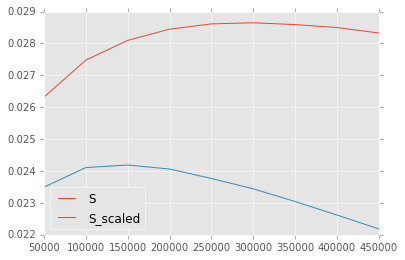

In [52]:
trans_eff_per_ribo.T.plot()

In [53]:
transcriptome_plotkin = pkl.load((open('../parameters/transcriptome_plotkin.p')))

In [54]:
transcriptome_scaled = {key: int(transcriptome_plotkin[key]*0.534) for key in transcriptome_plotkin}

In [55]:
sum(transcriptome_scaled.values())

30061

In [57]:
total_protein.minor_xs(1199.4)

,50000,100000,150000,200000,250000,300000,350000,400000,450000
S,1568976,3275188,5023991,6781019,8515662,10227702,11902470,13545337,15155638
S_scaled,1395249,2864941,4313234,5709655,7048143,8332969,9552235,10709549,11809155


## 3. Same with 60000 and 30000 transcripts

In [58]:
# runs = !find ../results -mtime -3

In [59]:
runs = ['../results/350000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160430_0853_1200s.p',
 '../results/100000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_1304_1200s.p',
 '../results/200000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_1938_1200s.p',
 '../results/500000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160501_1022_1200s.p',
 '../results/100000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_1348_1200s.p',
 '../results/450000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160501_0206_1200s.p',
 '../results/400000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160430_1524_1200s.p',
 '../results/300000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160430_0313_1200s.p',
 '../results/400000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160430_1825_1200s.p',
 '../results/450000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160430_2247_1200s.p',
 '../results/50000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_1209_1200s.p',
 '../results/500000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160501_0643_1200s.p',
 '../results/300000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160430_0541_1200s.p',
 '../results/350000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160430_1130_1200s.p',
 '../results/150000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_1506_1200s.p',
 '../results/250000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160430_0011_1200s.p',
 '../results/250000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_2207_1200s.p',
 '../results/50000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_1146_1200s.p',
 '../results/150000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_1612_1200s.p',
 '../results/200000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_1802_1200s.p']

In [60]:
for run in runs:
    print run
    #replace(run, "_numpypy.multiarray", "numpy.core.multiarray") # takes long time

../results/350000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160430_0853_1200s.p
../results/100000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_1304_1200s.p
../results/200000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_1938_1200s.p
../results/500000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160501_1022_1200s.p
../results/100000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160429_1348_1200s.p
../results/450000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160501_0206_1200s.p
../results/400000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced 

transcriptome length: 57558
350000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 57558
100000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 28808
200000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 28808
500000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 28808
100000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 28808
450000 ribosomes, 30061 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 57558
400000 ribosomes, 60000 phase transcriptome, full exome, no decay, median-enhanced initiation ra

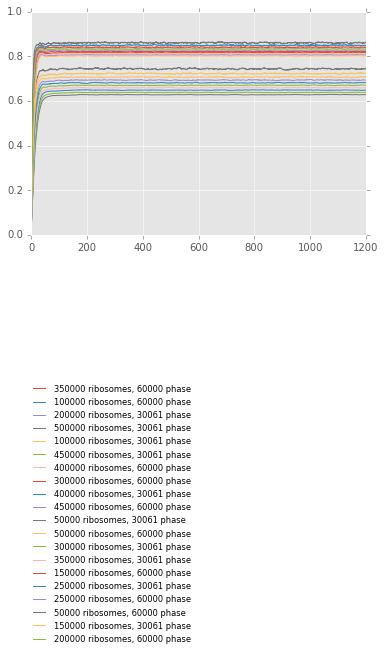

In [17]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
    
plt.rcParams['legend.loc'] = 'right'

for run in runs:
    results = pkl.load(open(run))
    print "transcriptome length: {}".format(len(results['transcriptome']))
    print results['description']
    plt.plot(results["timerange"], np.array(results["timecourses"]["ribos._bound"]) * 1.0 /
             (np.array(results["timecourses"]["ribos._bound"])+np.array(results["timecourses"]["ribos._free"])), 
             label=results['description'].split('transcriptome')[0].strip())
    plt.ylim([0.0, 1.0])

legend = plt.legend(prop = fontP, bbox_to_anchor=(0.5, -1.25)).get_frame()
legend.set_facecolor('white')

In [61]:
timecourses = {}

for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    timecourses[ribos] = {}
    
for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    phase = labellist[1].split("phase")[0].strip()
    results = pkl.load(open(run))
    timecourses[ribos][phase] = results['timecourses'] # we can now address as timecourses[100000]['S'] etc.
    
    # some genes have 5999, some 6000 timepoints, we have to fix that
    print "fixing uneven time series lengths..."
    num_timepoints = min([len(timecourses[ribos][phase][gene]) for gene in timecourses[ribos][phase]])

    print "creating timecourses..."
    timecourses[ribos][phase] = {key: timecourses[ribos][phase][key][:num_timepoints] 
                                 for key in timecourses[ribos][phase]
                                 if key in orf_genomic_dict}

fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time serie

In [62]:
ribo_numbers = sorted(timecourses.keys())
print ribo_numbers

[50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000]


In [63]:
data = pd.Panel4D(timecourses)
data

<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 10 (labels) x 2 (items) x 5999 (major_axis) x 4716 (minor_axis)
Labels axis: 50000 to 500000
Items axis: 30061 to 60000
Major_axis axis: 0 to 5998
Minor_axis axis: YAL001C to YPR199C

In [64]:
data.rename_axis(mapper=lambda x: 0.2*x, axis=2, inplace=True)

In [65]:
total_protein = data.sum(axis=3)
total_protein

<class 'pandas.core.panel.Panel'>
Dimensions: 10 (items) x 2 (major_axis) x 5999 (minor_axis)
Items axis: 50000 to 500000
Major_axis axis: 30061 to 60000
Minor_axis axis: 0.0 to 1199.6

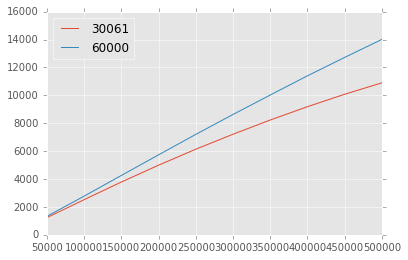

In [66]:
trans_eff_cell = (total_protein.minor_xs(1199.4) - total_protein.minor_xs(899.2))/(1199.4 - 899.2)
trans_eff_cell.T.plot()

In [67]:
trans_eff_cell

,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000
30061,1235.486342,2524.230513,3787.554963,4993.937375,6137.548301,7210.363091,8229.800133,9183.930713,10074.966689,10893.374417
60000,1330.616256,2776.848767,4259.946702,5735.932712,7201.115923,8628.600933,10021.862092,11397.118588,12716.492338,14006.628914


In [68]:
trans_eff_per_ribo = trans_eff_cell/ribo_numbers

In [69]:
trans_eff_per_ribo

,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000
30061,0.024710,0.025242,0.02525,0.02497,0.024550,0.024035,0.023514,0.022960,0.022389,0.021787
60000,0.026612,0.027768,0.02840,0.02868,0.028804,0.028762,0.028634,0.028493,0.028259,0.028013


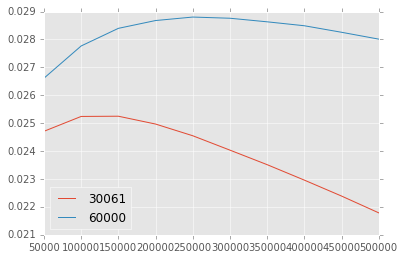

In [70]:
trans_eff_per_ribo.T.plot()

In [71]:
total_protein.minor_xs(1199.4)

,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000
30061,1469633,3003506,4499826,5927244,7274084,8547091,9741826,10860688,11903581,12867993
60000,1587140,3312610,5074509,6834019,8560786,10261550,11916241,13530086,15094998,16616056


## 4. Co-variation of tRNAs

In [4]:
runs = [
r"/home/martin/git/TRSL/results/50000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160512_0851_1200s.p",
r"/home/martin/git/TRSL/results/50000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160512_0827_1200s.p",
r"/home/martin/git/TRSL/results/100000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160509_1749_1200s.p",
r"/home/martin/git/TRSL/results/100000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160509_1838_1200s.p",
r"/home/martin/git/TRSL/results/150000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160509_2002_1200s.p",
r"/home/martin/git/TRSL/results/150000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160509_2106_1200s.p",
r"/home/martin/git/TRSL/results/200000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160509_2252_1200s.p",
r"/home/martin/git/TRSL/results/200000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_0018_1200s.p",
r"/home/martin/git/TRSL/results/250000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_0233_1200s.p",
r"/home/martin/git/TRSL/results/250000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_0422_1200s.p",
r"/home/martin/git/TRSL/results/300000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_0707_1200s.p",
r"/home/martin/git/TRSL/results/300000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_0922_1200s.p",
r"/home/martin/git/TRSL/results/350000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_1235_1200s.p",
r"/home/martin/git/TRSL/results/350000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_1507_1200s.p",
r"/home/martin/git/TRSL/results/400000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_1853_1200s.p",
r"/home/martin/git/TRSL/results/400000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160510_2149_1200s.p",
r"/home/martin/git/TRSL/results/450000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160511_0201_1200s.p",
r"/home/martin/git/TRSL/results/450000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160511_0523_1200s.p",
r"/home/martin/git/TRSL/results/500000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160511_1421_1200s.p",
r"/home/martin/git/TRSL/results/500000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160511_1021_1200s.p"
]

In [ ]:
for run in runs:
    print run
    replace(run, "_numpypy.multiarray", "numpy.core.multiarray") # takes long time

/home/martin/git/TRSL/results/50000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160512_0851_1200s.p
/home/martin/git/TRSL/results/50000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160512_0827_1200s.p
/home/martin/git/TRSL/results/100000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160509_1749_1200s.p
/home/martin/git/TRSL/results/100000 ribosomes, 30061 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160509_1838_1200s.p
/home/martin/git/TRSL/results/150000 ribosomes, 60000 phase transcriptome, varying tRNAs, full exome, no decay, median-enhanced initiation rates according to Shah_20160509_2002_1200s.p
/home/martin/git/TRSL/results/150000 ribosomes, 30061 phase transcriptome, va

In [ ]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
    
plt.rcParams['legend.loc'] = 'lower center'

for run in runs:
    results = pkl.load(open(run))
    print "transcriptome length: {}".format(len(results['transcriptome']))
    print results['description']
    plt.plot(results["timerange"], np.array(results["timecourses"]["ribos._bound"]) * 1.0 /
             (np.array(results["timecourses"]["ribos._bound"])+np.array(results["timecourses"]["ribos._free"])), 
             label=results['description'].split('transcriptome')[0].strip())
    plt.ylim([0.0, 1.0])

legend = plt.legend(prop = fontP, bbox_to_anchor=(0.5, -0.55)).get_frame()
legend.set_facecolor('white')

In [ ]:
orf_genomic_dict = pkl.load(open("../parameters/orf_coding.p"))

In [ ]:
timecourses = {}

for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    timecourses[ribos] = {}
    
for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    phase = labellist[1].split("phase")[0].strip()
    results = pkl.load(open(run))
    timecourses[ribos][phase] = results['timecourses'] # we can now address as timecourses[100000]['S'] etc.
    
    # some genes have 5999, some 6000 timepoints, we have to fix that
    print "fixing uneven time series lengths..."
    num_timepoints = min([len(timecourses[ribos][phase][gene]) for gene in timecourses[ribos][phase]])

    print "creating timecourses..."
    timecourses[ribos][phase] = {key: timecourses[ribos][phase][key][:num_timepoints] 
                                 for key in timecourses[ribos][phase]
                                 if key in orf_genomic_dict}

In [ ]:
ribo_numbers = sorted(timecourses.keys())
print ribo_numbers

In [ ]:
data = pd.Panel4D(timecourses)
data

In [ ]:
data.rename_axis(mapper=lambda x: 0.2*x, axis=2, inplace=True)

In [ ]:
total_protein = data.sum(axis=3)
total_protein

In [ ]:
trans_eff_cell = (total_protein.minor_xs(1199.4) - total_protein.minor_xs(899.2))/(1199.4 - 899.2)
trans_eff_cell.T.plot()

In [ ]:
trans_eff_per_ribo = trans_eff_cell/ribo_numbers

In [ ]:
trans_eff_per_ribo.T.plot()

In [ ]:
total_protein.minor_xs(1199.4)